<div>
<img src="https://media1.tenor.com/images/36ee59cad8a7e51c9546613e4521dc17/tenor.gif?itemid=14438682">
</div>

<div class="alert alert-block alert-success">  
<h1><center><strong>🚢 Break the ice</strong></center></h1>
    <p>
    The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Considering this, we have been asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e. name, age, gender, socio-economic class, etc).

</p>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<div class="alert alert-info">  
<h3><strong>Imports</strong></h3>
</div>

In [2]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 428 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix
from xgboost import XGBClassifier
from pywaffle import Waffle
from yellowbrick.classifier import classification_report

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

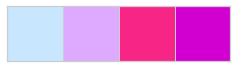

In [5]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [6]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

<div class="alert alert-info">  
<h3><strong>Reading the csv files</strong></h3>
</div>

In [7]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train_data.shape

(891, 12)

In [9]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [10]:
test_data.shape

(418, 11)

<div class="alert alert-info">  
<h3><strong>Generate descriptive statistics</strong></h3>
</div>

* DataFrame.count: 
Count number of non-NA/null observations.

* DataFrame.max: 
Maximum of the values in the object.

* DataFrame.min:
Minimum of the values in the object.

* DataFrame.mean:
Mean of the values.

* DataFrame.std:
Standard deviation of the observations.

In [11]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<div class="alert alert-info">  
<h3><strong>Data types of attributes</strong></h3>
</div>


In [12]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<div class="alert alert-info">  
<h3><strong>Checking columns for null values</strong></h3>
</div>


In [13]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<div class="alert alert-info">  
<h3><strong>Number of Unique values per column</strong></h3>
</div>


In [14]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

> All passenger IDs are unique and there are no missing values for this column.

<div class="alert alert-info">  
<h3><strong>Pandas profiling</strong></h3>
</div>

Generates profile reports from a pandas DataFrame. 

The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [15]:
profile = pandas_profiling.ProfileReport(train_data)

In [16]:
profile

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<div class="alert alert-info">  
<h3><strong>Modifying Cabin column</strong></h3>
</div>

Distribution of class

<div>
<img src="https://i.imgur.com/bvyChJc.jpg">
</div>

Decks

<div>
<img src="https://i.imgur.com/FAMeIC7.png">
</div>

In [17]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
train_data['Cabin'] = train_data['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')
test_data['Cabin'] = test_data['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')

Z indicates those values that are missing.

In [19]:
train_data['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [20]:
train_data[train_data['Cabin']=='T'].index.values

array([339])

In [21]:
test_data[test_data['Cabin']=='T'].index.values

array([], dtype=int64)

In [22]:
train_data.iloc[339]

PassengerId                             340
Survived                                  0
Pclass                                    1
Name           Blackwell, Mr. Stephen Weart
Sex                                    male
Age                                      45
SibSp                                     0
Parch                                     0
Ticket                               113784
Fare                                   35.5
Cabin                                     T
Embarked                                  S
Name: 339, dtype: object

There is no evidence that anyone else occupied the T Boat Deck cabin.
Since he was a class 1 passenger, we group him with the A deck passengers.

In [23]:
index = train_data[train_data['Cabin'] == 'T'].index
train_data.loc[index, 'Cabin'] = 'A'

In [24]:
def plot_bar(df, feat_x, feat_y,s, normalize=True):
    ct = pd.crosstab(df[feat_x], df[feat_y])
    return ct.plot(kind='bar', stacked=s)

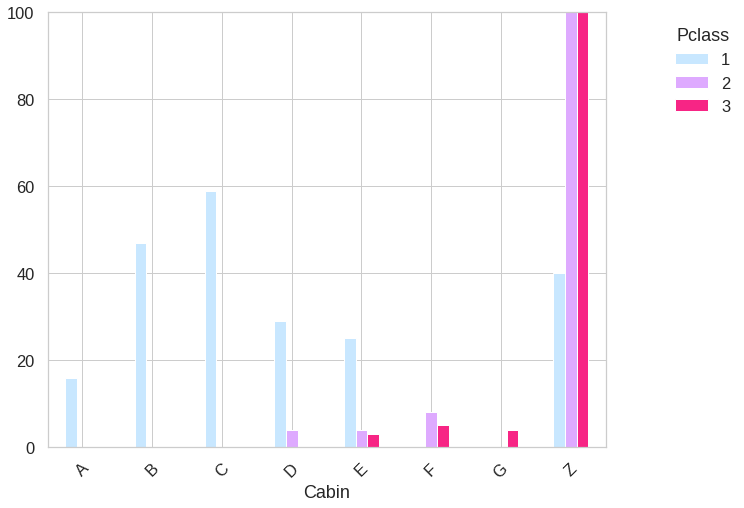

In [25]:
dpi=80
plot_bar(train_data, 'Cabin', 'Pclass',False)
plt.legend(title='Pclass',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.show()

* A, B and C have only class 1 passengers.
* D has both class 1 and 2 passengers. E has class 1, 2 and 3 passengers. So these two can be grouped together.
* F and G both have class 2 and 3 passengers.

In [26]:
train_data['Cabin'] = train_data['Cabin'].replace(['A', 'B', 'C'], 'ABC')
train_data['Cabin'] = train_data['Cabin'].replace(['D', 'E'], 'DE')
train_data['Cabin'] = train_data['Cabin'].replace(['F', 'G'], 'FG')

test_data['Cabin'] = test_data['Cabin'].replace(['A', 'B', 'C'], 'ABC')
test_data['Cabin'] = test_data['Cabin'].replace(['D', 'E'], 'DE')
test_data['Cabin'] = test_data['Cabin'].replace(['F', 'G'], 'FG')

<div class="alert alert-info">  
<h3><strong>Dropping columns and filling NA values using the specified method</strong></h3>
</div>

In [27]:
train_data.drop(["Ticket", "Name", "PassengerId"], axis=1, inplace=True)
test_data.drop(["Ticket", "Name", "PassengerId"], axis=1, inplace=True)

train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)


test_data["Fare"].fillna(test_data["Fare"].median(skipna=True), inplace=True)

train_data["Embarked"].fillna('S', inplace=True)
test_data["Embarked"].fillna('S', inplace=True)

In [28]:
train_data["Cabin"].unique()

array(['Z', 'ABC', 'DE', 'FG'], dtype=object)

<div class="alert alert-info">  
<h3><strong>Label encoding</strong></h3>
</div>

In [29]:
gender = {'male': 0, 'female': 1}
train_data.Sex = [gender[item] for item in train_data.Sex] 
test_data.Sex = [gender[item] for item in test_data.Sex] 

embarked = {'S': 0, 'C': 1, 'Q':2}
train_data.Embarked = [embarked[item] for item in train_data.Embarked] 
test_data.Embarked = [embarked[item] for item in test_data.Embarked] 


train_data['Cabin'] = LabelEncoder().fit_transform(train_data['Cabin'])
test_data['Cabin'] = LabelEncoder().fit_transform(test_data['Cabin'])

In [30]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

<div class="alert alert-info">  
<h3><strong>EDA</strong></h3>
</div>

<div class="alert alert-info">  
<h3><strong>Distribution of Gender</strong></h3>
</div>

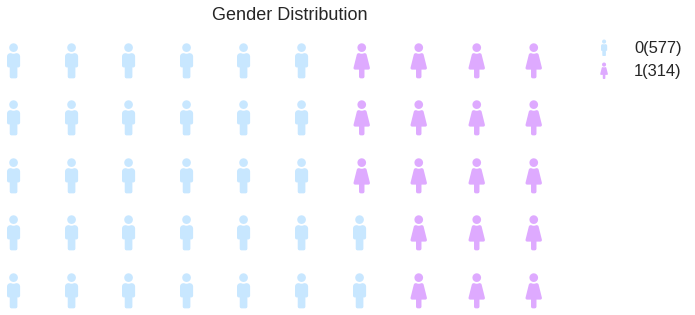

In [31]:
gender = train_data['Sex'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=gender,
    colors = (custom_colors[0], custom_colors[1]),
    title={'label': 'Gender Distribution', 'loc': 'center'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35, 
    icons = ['male','female'],
    icon_legend=True,
    figsize=(10, 8)
)

Male: 577
Female: 314

<div class="alert alert-info">  
<h3><strong>Distrubution of Age</strong></h3>
</div>

In [32]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(15,8),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

In [33]:
def hist(x,title):
    plt.figure(figsize = (10,8))
    ax = sns.distplot(x, 
                 kde=False);
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches, colors):
        rec.set_color(col)
    plt.title(title)

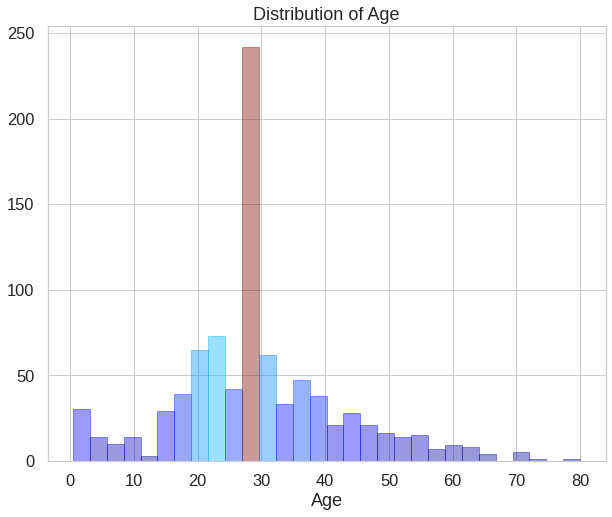

In [34]:
hist(train_data['Age'],'Distribution of Age')

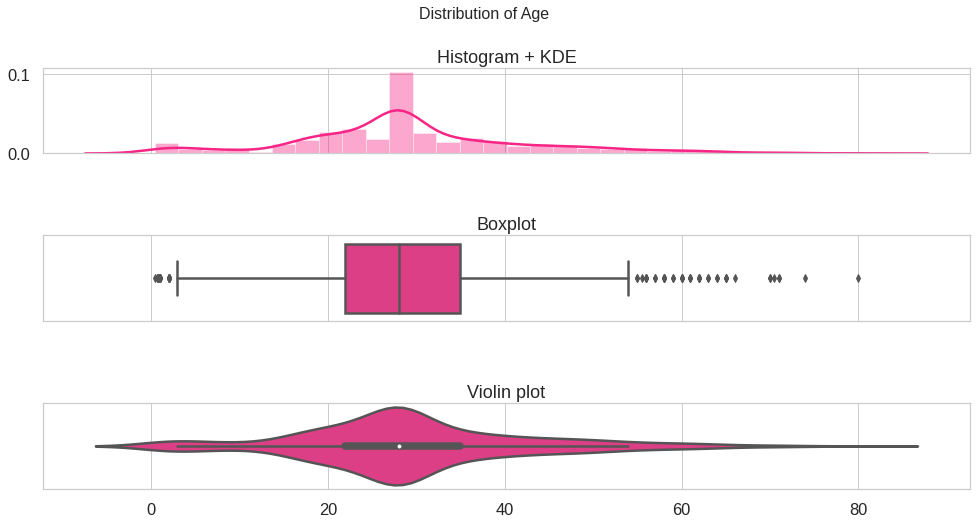

In [35]:
triple_plot(train_data['Age'],'Distribution of Age',custom_colors[2])

<div class="alert alert-info">  
<h3><strong>Distribution of Fare</strong></h3>
</div>

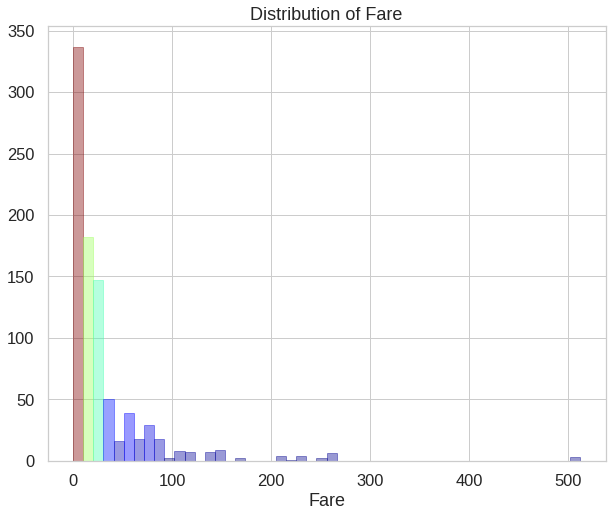

In [36]:
hist(train_data['Fare'],'Distribution of Fare')

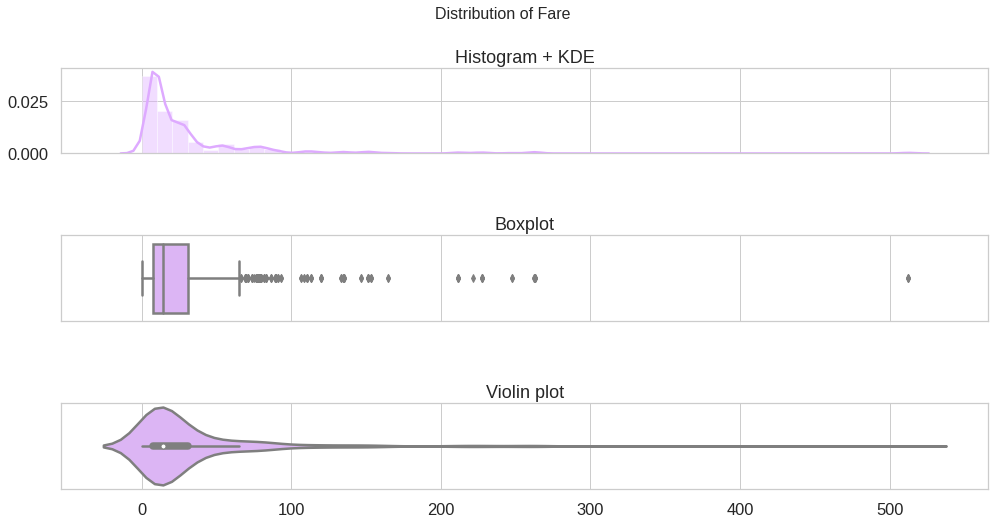

In [37]:
triple_plot(train_data['Fare'],'Distribution of Fare',custom_colors[1])

<div class="alert alert-info">  
<h3><strong>Pclass and Age vs Survived</strong></h3>
</div>

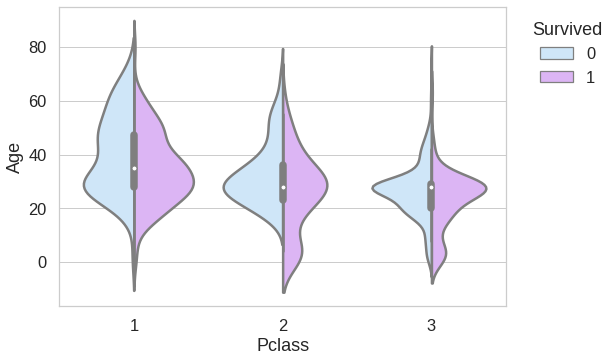

In [38]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=train_data)
plt.legend(title='Survived',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

<div class="alert alert-info">  
<h3><strong>Cabin vs Survived</strong></h3>
</div>

In [39]:
td = pd.read_csv("/kaggle/input/titanic/train.csv")
td["Cabin"]=td.Cabin.str[0]

> Before grouping

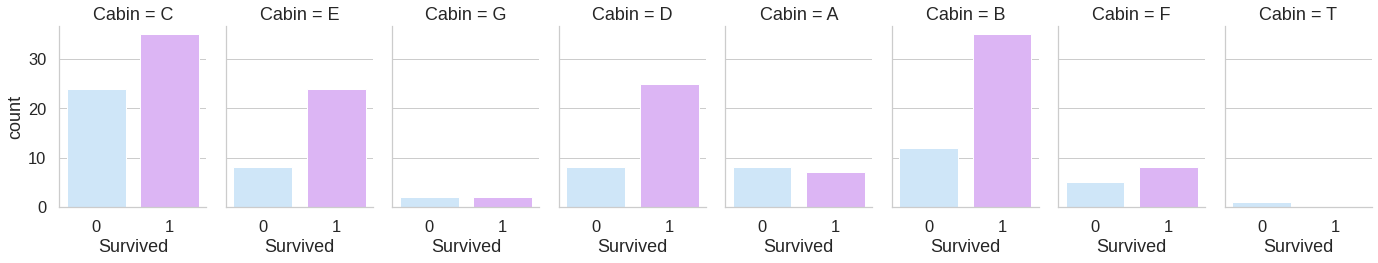

In [40]:
sns.catplot("Survived", col="Cabin", col_wrap=8,data=td[td.Cabin.notnull()],kind="count",height=4,aspect=.6)
plt.show()

> After grouping 

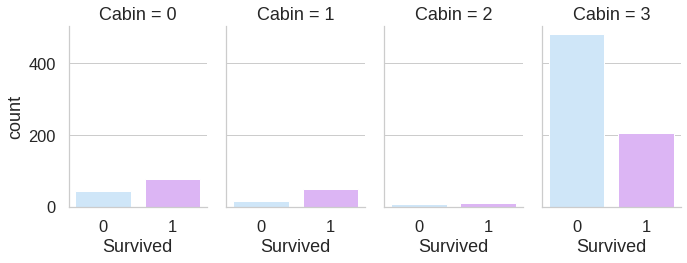

In [41]:
sns.catplot("Survived", col="Cabin", col_wrap=4,data=train_data,kind="count", height=4,aspect=.6)
plt.show()

* Cabin 0: ABC
* Cabin 1: DE
* Cabin 2: FG
* Cabin 3: Z(missing values)

<div class="alert alert-info">  
<h3><strong>SibSp vs Survived</strong></h3>
</div>

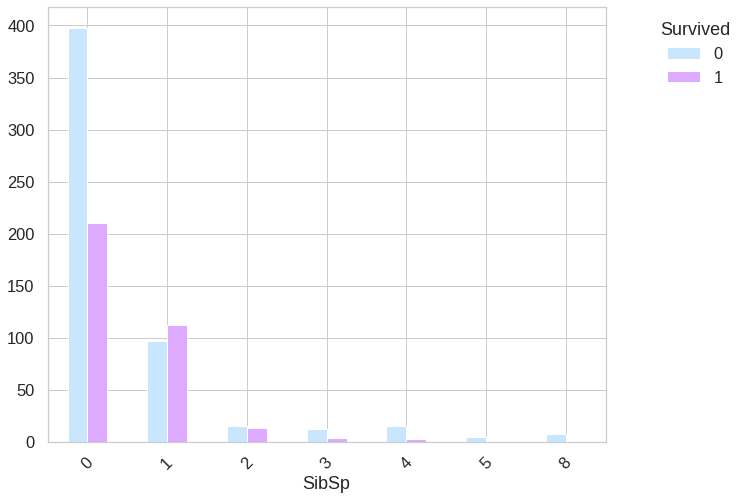

In [42]:
plot_bar(train_data, 'SibSp', 'Survived',False)
plt.legend(title='Survived',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">  
<h3><strong>Parch vs Survived</strong></h3>
</div>


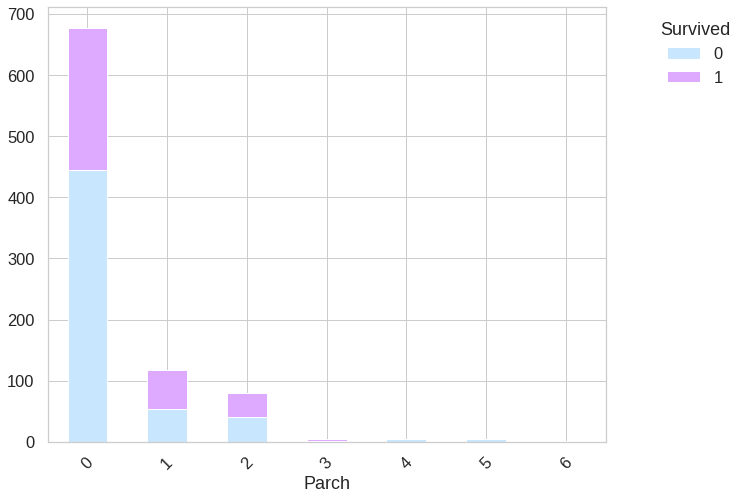

In [43]:
plot_bar(train_data, 'Parch', 'Survived',True)
plt.legend(title='Survived',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">  
<h3><strong>Gender vs Survived</strong></h3>
</div>

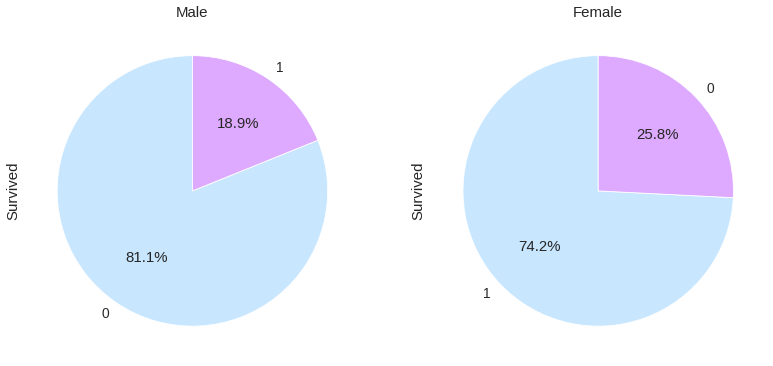

In [44]:
data = train_data[['Sex','Survived']]
data1 = data.loc[data.Sex==0]
data2 = data.loc[data.Sex!=0]

plt.figure(figsize=(16,8),dpi=60)

ax1 = plt.subplot(121, aspect='equal')
data1['Survived'].value_counts().plot.pie(startangle=90,autopct='%1.1f%%', ax=ax1)
ax1.title.set_text('Male')

ax2 = plt.subplot(122, aspect='equal')
data2['Survived'].value_counts().plot.pie(startangle=90,autopct='%1.1f%%', ax=ax2)
ax2.title.set_text('Female')

plt.show()

<div class="alert alert-info">  
<h3><strong>Embarked and Fare vs Survived</strong></h3>
</div>

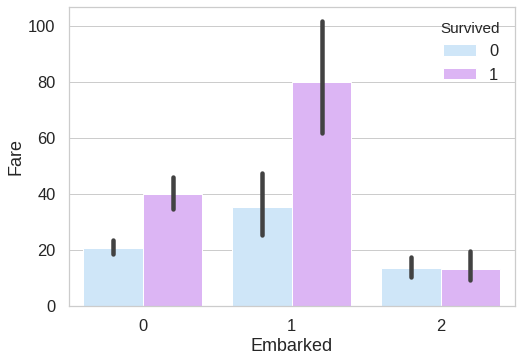

In [45]:
sns.barplot(x = "Embarked", y = "Fare", hue = "Survived", data = train_data)
plt.show()

<div class="alert alert-info">  
<h3><strong>Fare vs Survived</strong></h3>
</div>

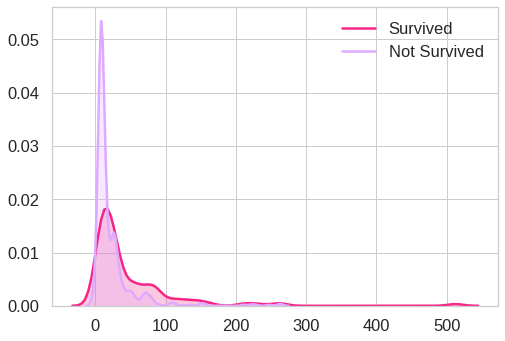

In [46]:
sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color=custom_colors[2], shade=True)
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color=custom_colors[1], shade=True)
plt.legend(['Survived', 'Not Survived'])
plt.show()

<div class="alert alert-info">  
<h3><strong>Age vs Survived</strong></h3>
</div>

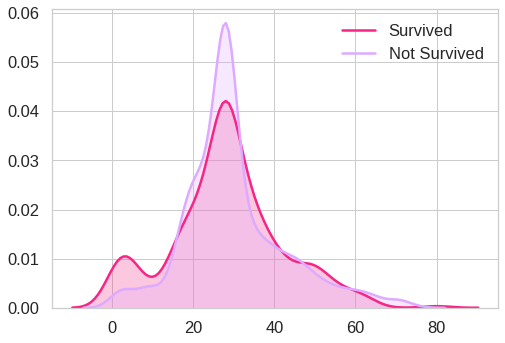

In [47]:
sns.kdeplot(train_data['Age'][train_data.Survived == 1], color=custom_colors[2], shade=True)
sns.kdeplot(train_data['Age'][train_data.Survived == 0], color=custom_colors[1], shade=True)
plt.legend(['Survived', 'Not Survived'])
plt.show()

<div class="alert alert-info">  
<h3><strong>Correlation</strong></h3>
</div>

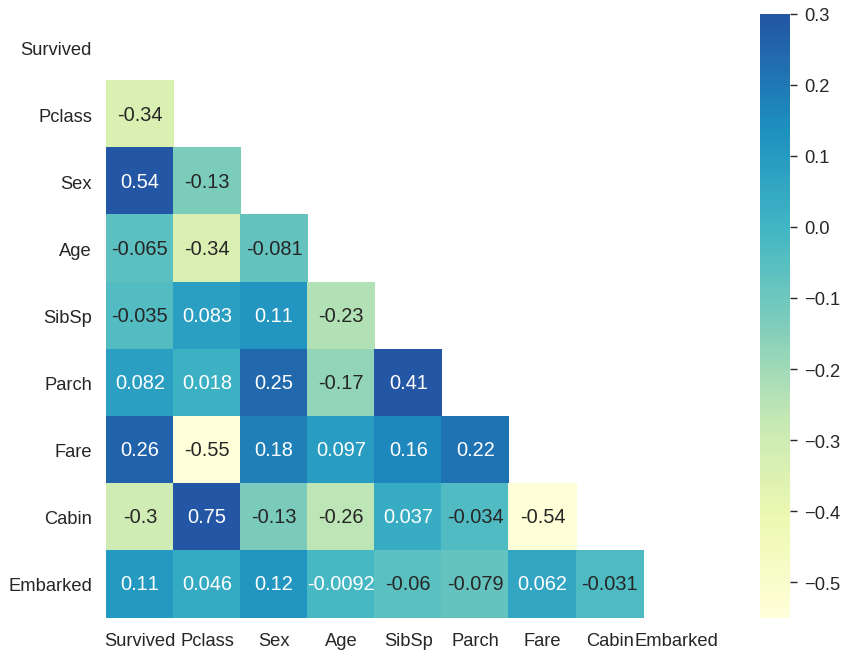

In [48]:
mask = np.triu(np.ones_like(train_data.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(16,10),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(train_data.corr(), mask=mask, cmap="YlGnBu", vmax=.3, center=0,annot = True,
            square=True)
plt.show()

In [49]:
expected_values = train_data["Survived"]
train_data.drop("Survived", axis=1, inplace=True)

In [50]:
train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

<div class="alert alert-info">  
<h3><strong>Training and testing</strong></h3>
</div>

In [51]:
X = train_data.values
y = expected_values.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [52]:
model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

In [53]:
# model = XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=300, seed=0)

In [54]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

In [55]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.8778089887640449
Testing accuracy:  0.8435754189944135


In [56]:
column_values = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 
X_train
X_train_df = pd.DataFrame(data = X_train,   
                  columns = column_values) 
X_test_df = pd.DataFrame(data = X_test,   
                  columns = column_values) 

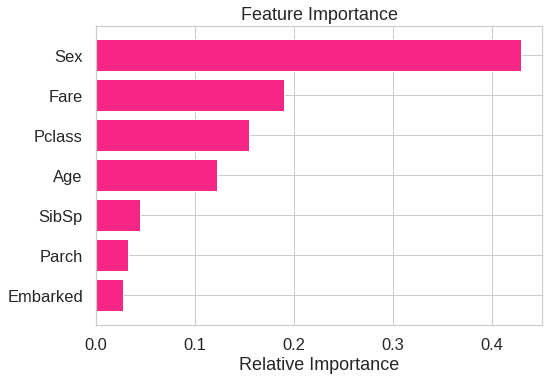

In [57]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train_df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color=custom_colors[2], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

> The women and children were allowed to leave the ship first.

<div class="alert alert-info">  
<h3><strong>Confusion Matrix</strong></h3>
</div>


![](https://miro.medium.com/max/2800/0*9r99oJ2PTRi4gYF_.jpg)

In [58]:
print("\nConfusion Matrix\n")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


Confusion Matrix

[[101   9]
 [ 19  50]]


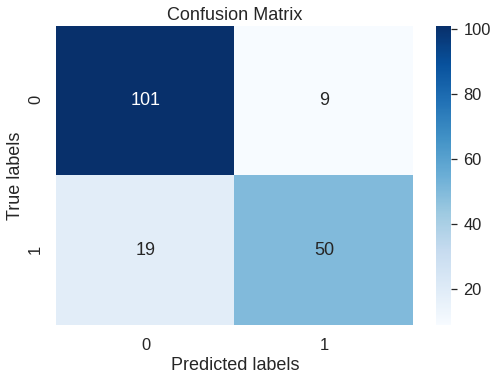

In [59]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g',cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

<div class="alert alert-info">  
<h3><strong>ROC Curve</strong></h3>
</div>

![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )


ROC AUC on evaluation set 0.8214097496706194


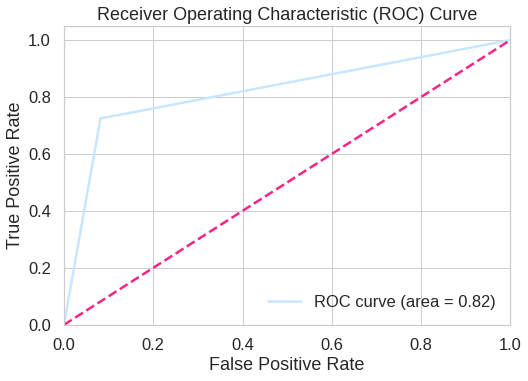

In [61]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color=custom_colors[0])
plt.plot([0, 1], [0, 1], 'k--',color=custom_colors[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
model.fit(train_data, expected_values)
print("%.4f" % model.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.1s finished


0.8294


<div class="alert alert-info">  
<h3><strong>Precision, Recall, F1 score</strong></h3>
</div>

<div>
<img src="https://i.imgur.com/WEzWTOU.jpg" width="600" height="400">
</div>

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tas

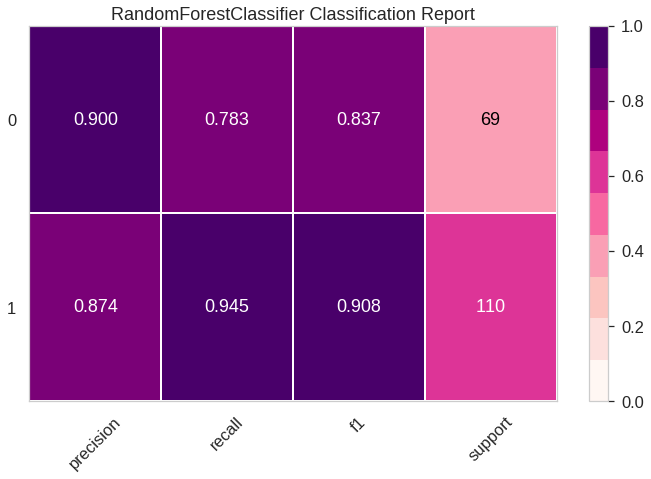

In [63]:
plt.figure(figsize=(10,7))
classes = [1,0]
visualizer = classification_report(
    model, X_train, y_train, X_test, y_test, classes=classes, support=True, cmap='RdPu'
)

<div class="alert alert-info">  
<h3><strong>Creating the submission file</strong></h3>
</div>

In [64]:
passenger_IDs = pd.read_csv("/kaggle/input/titanic/test.csv")[["PassengerId"]].values
preds = model.predict(test_data.values)
preds

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.5s finished


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
df = {'PassengerId': passenger_IDs.ravel(), 'Survived': preds}
df_predictions = pd.DataFrame(df).set_index(['PassengerId'])
df_predictions.head(10)

Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
897                 0
898                 1
899                 0
900                 1
901                 0

In [66]:
df_predictions.to_csv('/kaggle/working/Predictions.csv')